# Trabalho – Predição e Regressão Lineares

- Prazo: 21/05.
- valor 4,0 pontos

Ao enviar o e-mail, escreva na linha do Assunto que é o Trabalho de Predição/Regresssão e os nomes dos alunos.

É importante produzir algum texto que analise criticamente cada gráfico/tabela/quadro/mapa.
Eventualmente vocês podem observar alguma observação que potencialmente possa estar associada com a violação de alguns dos pressupostos do modelo de regressão linear. Cabe listar tais observações.Uma das ferramentas para a identificação de tais observações pode ser o summary(seu_conjunto_de_dados) ao observar quais são as observações extremas (máximas ou mínimas). Tais observações podem estar associadas com outliers, pontos de influência e alavancagem, Heterocedasticidade ou não-normalidade. Nos histogramas podemos observar tais observações como aqueles valores extremos que reforçam a assimetria da distribuição.


> Dados (housing.csv)


### Preparação

1. **Importe os dados em um data.frame de nome housing.**

OBS: Cada modelo que você criar dê os nomes house1, house2, house3, etc. 

2. **(0,25 ponto) Renomear as colunas do conjunto de dados. Os novos nomes deverão ser:**
> Neighborhood, Class, Units, YearBuilt, SqFt, Income, IncomePerSqFt, Expense, ExpensePerSqFt, NetIncome, Value, ValuePerSqFt e Boro.

3. **Salve os nomes novos em um vetor de caracteres nomes_novos.** 

4. **Salve este vetor em colnames(housing).**

### Investigação sobre os dados:
 
5. **(0,25 ponto) Faça um histograma colocando no eixo x ValuePerSqFt.** 

OBS: Este histograma possui a característica de bimodalidade. Pesquise sobre o que pode significar um histograma bimodal e o que isso pode implicar para o Cientista de Dados a respeito do conjunto de dados.

6. **(0,25 ponto) Plote um histograma para cada um dos bairros: Manhatan, Brooklyn, Queens, Bronx e Staten Island.**

OBS: Produza uma breve análise sobre o que é possível concluir a respeito desses histogramas. Os histogramas apresentam forte assimetria? Em que isto pode afetar a regressão?

7. **(0,25 ponto) Investigue NA´s (Not Available = missing data = dados ausentes)**
    - Faça summary(housing). Você identifica valores ausentes? 
    - Faça sum(is.na(housing) para contar quantos são os valores ausentes. 
    - Eles estão espalhados por mais de uma variável? 
    - Pesquise sobre os comandos na.omit e complete.cases. 
    - Faça a tabela de dupla entrada tabela_Boro_class<-xtabs (~Boro + Class, data = housing). Algo chama a atenção?
    - Faça prop.table(tabela_Boro_class)

8. **(0,5 ponto) Construa os modelos de regressão:**


{-------------------------- **Codigo louco do frança**

	house1:ValuePerSqFt~Units+SqFt+YearBuilt+Income+Boro
	house2:ValuePerSqFt~Units*SqFt+YearBuilt+IncomePerSqFt+Income	+Boro
	house_log1:ValuePerSqFt~log⁡(Units)+log⁡(SqFt)+Boro
	house_log2:log⁡(ValuePerSqFt)~log⁡(Units)+log⁡(SqFt)+Boro
    
--------------------------------}



9. **Compare os modelos usando AIC(modelo1, modelo2, modelo3,modelo4)**

OBS: Um dos critérios para se comparar modelos de regressão é o Akaike Information Criteria AIC. 


10. **(0,5 ponto) Apresente os gráficos de resíduos x fitted para cada um dos modelos. O que eles sugerem?**

11. **(0,5 ponto) Faça o correspondente teste de Hipótese. Qual sua conclusão para cada modelo?**

12. **(0,5 ponto) Apresente os gráficos qqPlot para cada modelo. O que eles sugerem?**

13. **(0,5 ponto) Faça o correspondente teste de hipótese. Qual sua conclusão?**

14. **(0,5 ponto) Algum dos modelos apresenta problemas de multicolinearidade?**

{-----------------------------  **Dicas do frança**

	Outros itens que acabamos não abordando nesta disciplina foram: 
	separar os dados em conjuntos treino e teste
	verificar sobreajuste (over-fitting) 
	mudanças de escalas nas variáveis. Por vezes as variáveis preditoras 
	estão em escalas muito diferentes e temos que normalizá-las 	
	(ou estandardizá-las) subtraindo a média e dividindo pelo desvio padrão 	
	para ficarem todas comparáveis na mesma escala. 
	
	Não cheguei a testar neste conjunto de dados, mas é capaz que 	
	tentar construir um modelo de regressão para cada bairro, talvez 	
	reduza a Heterocedasticidade. 
---------------------------}


### FUNÇÔES UTILIZADAS AO DECORRER DA ATIVIDADE 

In [103]:
#Bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#Plota histograma com matplotlib
def histogramaPLT(valor, bins):
    # definindo o tamanho do gráfico
    fig, ax = plt.subplots(figsize=(20, 10))

    #  plotando apenas a coluna ValuePerSqFt
    plt.hist(valor, bins=bins, alpha=0.7, rwidth=0.85)

    # formatando o título do gráfico (definindo tamanho e distância entre o título e o gráfico em si)
    plt.title('Distribuição de frequência dos valores dos imóveis por pés quadrado', size=20, pad=15)

    # removendo as linhas superior e direita
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # definindo as labels e seus tamanhos
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    labels = list(range(0,425,25))
    plt.xticks(labels,labels)
    plt.xlabel('ValuePerSqFt (em US$)', fontsize=18, labelpad=15)
    plt.ylabel('Frequência', fontsize=18, labelpad=15);

#Plota histograma com seaborn
def histogramaSNS(valor, bins):
    # definindo o tamanho do gráfico
    fig, ax = plt.subplots(figsize=(20, 10))

    #  plotando apenas a coluna ValuePerSqFt
    sns.distplot(valor, hist=True, kde=True, 
                 bins=bins, color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})

    # formatando o título do gráfico (definindo tamanho e distância entre o título e o gráfico em si)
    plt.title('Distribuição de frequência dos valores dos imóveis por pés quadrado', size=20, pad=15)

    # removendo as linhas superior e direita
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # definindo as labels e seus tamanhos
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    labels = list(range(0,425,25))
    plt.xticks(labels,labels)
    plt.xlabel('ValuePerSqFt (em US$)', fontsize=18, labelpad=15)
    plt.ylabel('Frequência', fontsize=18, labelpad=15);

### IMPORTANDO DATASET

In [76]:
import pandas as pd
housing = pd.read_csv('housing.csv')
#O conjunto de dados (housing.csv) refere-se a um conjunto de dados do município de NY 
    #ano fiscal de 2011-2012 
#Os dados estão separados por bairro:
    #Manhatan, Brooklyn, Queens, Bronx e Staten Island. 

housing.head(10)

,Neighborhood,Building.Classification,Total.Units,Year.Built,Gross.SqFt,Estimated.Gross.Income,Gross.Income.per.SqFt,Estimated.Expense,Expense.per.SqFt,Net.Operating.Income,Full.Market.Value,Market.Value.per.SqFt,Boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan
5,TRIBECA,R4-CONDOMINIUM,133,1986.0,139719,5127687,36.70,1497788,10.72,3629899,26737996,191.37,Manhattan
6,TRIBECA,R4-CONDOMINIUM,109,1985.0,105000,4365900,41.58,1273650,12.13,3092250,22210281,211.53,Manhattan
7,TRIBECA,R4-CONDOMINIUM,107,1986.0,87479,3637377,41.58,1061120,12.13,2576257,19449002,222.33,Manhattan
8,TRIBECA,R4-CONDOMINIUM,247,1987.0,255845,11246946,43.96,2440761,9.54,8806185,66316999,259.21,Manhattan
9,TRIBECA,R4-CONDOMINIUM,121,1985.0,106129,4115683,38.78,1231096,11.60,2884587,21821999,205.62,Manhattan


### TABELA LEGENDA DAS COLUNAS

<table style="width:100%">
  <tr>
    <th>coluna</th>
    <th>traducao</th>
    <th>nova_coluna</th>
  </tr>
  <tr>
    <td>Neighborhood</td>
    <td>Vizinhança</td>
    <td>Neighborhood</td>
  </tr>
  <tr>
    <td>Building.Classification</td>
    <td>Classificação do edifício</td>
    <td>Class</td>
  </tr>
  <tr>
    <td>Total.Units</td>
    <td>Unidades totais</td>
    <td>Units</td>
  </tr>
  <tr>
    <td>Year.Built</td>
    <td>Ano de construção</td>
    <td>YearBuilt</td>
  </tr>
  <tr>
    <td>Gross.SqFt</td>
    <td>Pés quadrados bruto</td>
    <td>SqFt</td>
  </tr>
  <tr>
    <td>Estimated.Gross.Income</td>
    <td>Renda Bruta Estimada</td>
    <td>Income</td>
  </tr>
  <tr>
    <td>Gross.Income.per.SqFt</td>
    <td>Renda Bruta por pé quadrado</td>
    <td>IncomePerSqFt</td>
  </tr>
  <tr>
    <td>Estimated.Expense</td>
    <td>Despesa estimada</td>
    <td>Expense</td>
  </tr>
  <tr>
    <td>Expense.per.SqFt</td>
    <td>Despesa por pé quadrado</td>
    <td>ExpensePerSqFt</td>
  </tr>
  <tr>
    <td>Net.Operating.Income</td>
    <td>Receita operacional líquida</td>
    <td>NetIncome</td>
  </tr>
  <tr>
    <td>Full.Market.Value</td>
    <td>Valor total de mercado</td>
    <td>Value</td>
  </tr>
  <tr>
    <td>Market.Value.per.SqFt</td>
    <td>Valor de mercado por pé quadrado</td>
    <td>ValuePerSqFt</td>
  </tr>
  <tr>
    <td>Boro</td>
    <td>Bairro</td>
    <td>Boro</td>
  </tr>
</table>

In [77]:
#1. **Importe os dados em um data.frame de nome housing.**
#2. **(0,25 ponto) Renomear as colunas do conjunto de dados. Os novos nomes deverão ser:**
    # Neighborhood, Class, Units, YearBuilt, SqFt, Income, IncomePerSqFt, Expense, ExpensePerSqFt, NetIncome, Value, ValuePerSqFt e Boro.
#3. **Salve os nomes novos em um vetor de caracteres nomes_novos.** 
#4. **Salve este vetor em colnames(housing).**

In [78]:
nomes_novos = ['Neighborhood', 'Class', 'Units', 'YearBuilt', 'SqFt', 'Income', 'IncomePerSqFt', 'Expense', 'ExpensePerSqFt', 'NetIncome', 'Value', 'ValuePerSqFt','Boro']

In [79]:
housing = housing.rename(columns={"Neighborhood": "Neighborhood", "Building.Classification": "Class", "Total.Units": "Units", "Year.Built": "YearBuilt", "Gross.SqFt": "SqFt", "Estimated.Gross.Income": "Income", "Gross.Income.per.SqFt": "IncomePerSqFt", "Estimated.Expense": "Expense", "Expense.per.SqFt": "ExpensePerSqFt", "Net.Operating.Income": "NetIncome", "Full.Market.Value": "Value", "Market.Value.per.SqFt": "ValuePerSqFt", "Boro": "Boro"})

In [80]:
housing.shape

(2626, 13)

In [81]:
housing.describe().round(2)

,Units,YearBuilt,SqFt,Income,IncomePerSqFt,Expense,ExpensePerSqFt,NetIncome,Value,ValuePerSqFt
count,2626.00,2530.00,2626.00,2626.00,2626.00,2626.00,2626.00,2626.00,2.626000e+03,2626.00
mean,70.18,1967.46,82762.87,2640881.94,27.57,840916.08,9.40,1799965.85,1.297781e+07,131.19
std,135.13,40.16,144023.72,4635767.98,10.59,1447246.92,2.35,3276327.60,2.374528e+07,68.55
min,1.00,1825.00,478.00,6424.00,3.57,1740.00,0.97,4684.00,3.000000e+04,10.66
25%,15.00,1926.00,18704.50,405180.00,18.79,155514.75,7.64,239699.75,1.677750e+06,74.63
50%,30.00,1986.00,38455.50,943901.00,25.00,350263.50,9.18,581522.50,4.026500e+06,112.22
75%,75.00,2005.00,90626.25,2725550.50,36.82,899084.50,11.05,1805149.25,1.313675e+07,187.49
max,3378.00,2010.00,3364977.00,56010967.00,62.80,21771401.00,18.21,40144686.00,2.951820e+08,399.38


In [84]:
housing['ValuePerSqFt']

0       200.00
1       242.76
2       164.15
3       271.23
4       247.48
         ...  
2621     53.76
2622     57.75
2623     59.40
2624     35.80
2625     33.74
Name: ValuePerSqFt, Length: 2626, dtype: float64

## Distribuição de Frequências

In [85]:
#5. **(0,25 ponto) Faça um histograma colocando no eixo x ValuePerSqFt.** 
#OBS: Este histograma possui a característica de bimodalidade. 
#Pesquise sobre o que pode significar um histograma bimodal e o que isso pode implicar para o 
#Cientista de Dados a respeito do conjunto de dados.

Ao analisar a distribuição de freqüências de uma variável quantitativa devemos verificar basicamente três características:
    
> 1ª característica: Tendência Central
    
É a classe de maior freqüência, chamada de classe modal. No histograma, esta classe corresponde àquela com barra mais alta ("pico"). No caso abaixo, temos um histograma que pode ser considerado bimodal pois indica a existência de dois grupos, com valores centrados em dois pontos diferentes do eixo de valores.
    
OBS: No primeiro gráfico de histograma, devido ao baixo número de bins (colunas), não podemos notar estes dois pontos centrais, porém ao aumentar o número de bins, como no segundo gráfico de histograma, podemos ver com mais clareza a tendencia bimodal. 

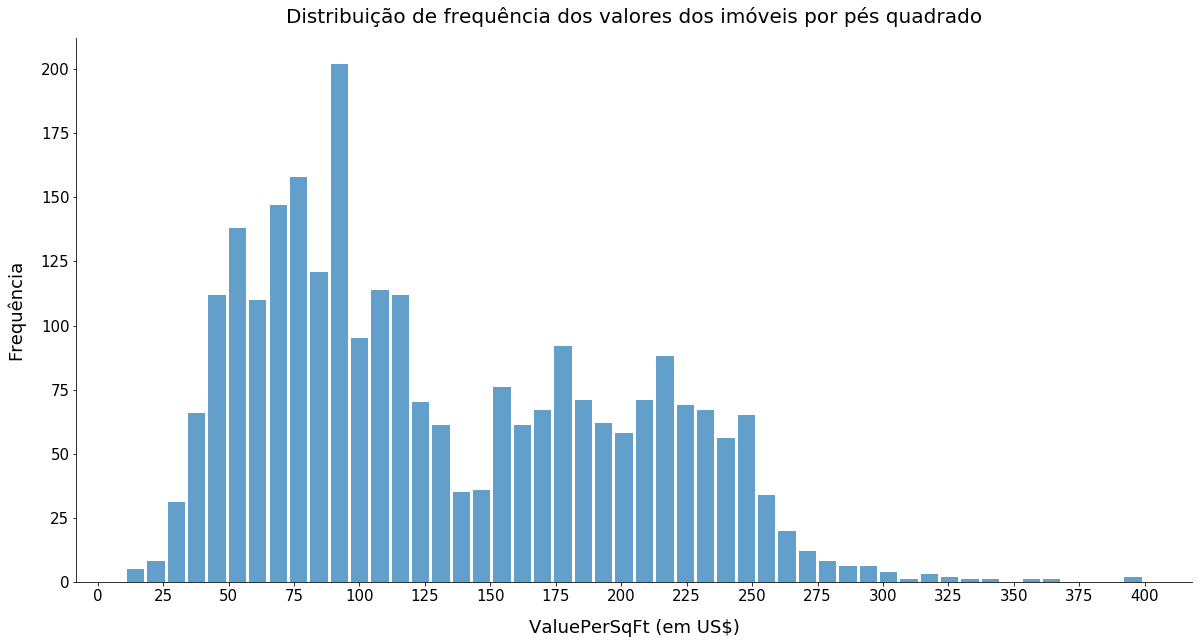

In [104]:
# Gráfico de distribuição de frequência da variável ValuePerSqFt
histogramaPLT(housing['ValuePerSqFt'], 50)

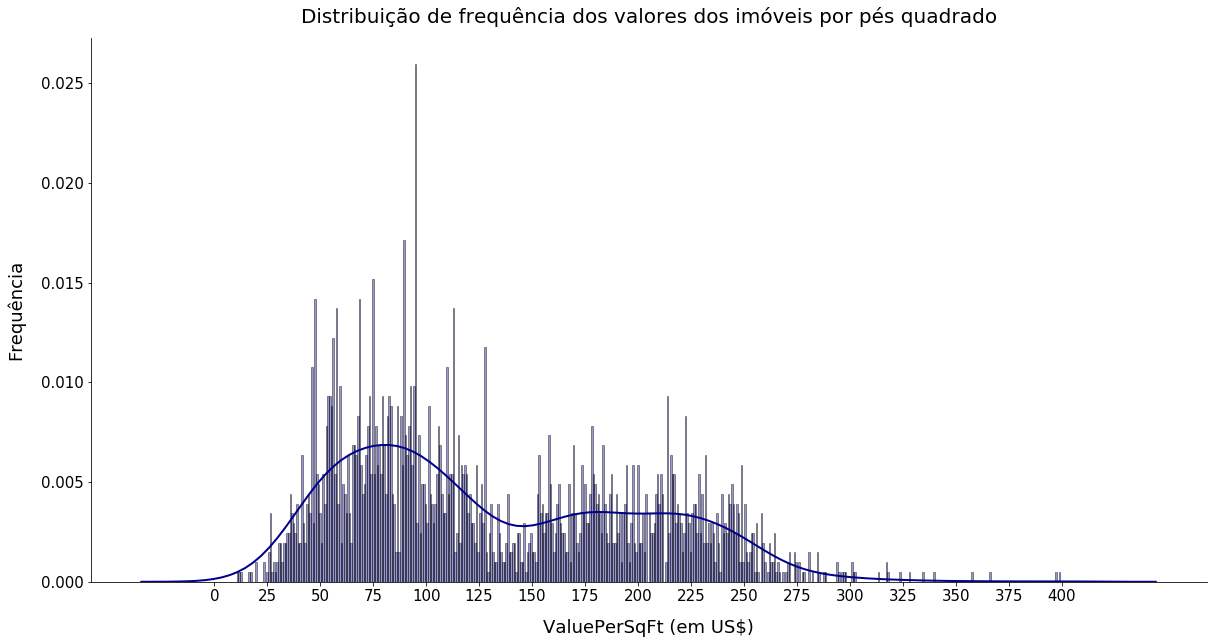

In [105]:
# Gráfico de distribuição de frequência da variável ValuePerSqFt
histogramaSNS(housing['ValuePerSqFt'],500)

> 2º característica: Variabilidade

Indica a variação, ou seja, a amplitule dos valores de cada ocorrência. No caso abaixo podemos notar que apesar dos valores oscilarem de, aproximadamente 10 a 399 dólares por pés quadrado, a concentração de variação está entre 25 a 275. 
 
> 3º característica: Forma

A terceira característica corresponde a observação de simetria ou assimetria do gráfico. No caso acima temos uma tendencia de assimetria, pois existe uma maior concentração a esquerda e a formação de uma cauda mais longa a direita. (histograma assimétrico a direita). 

In [64]:
#6. **(0,25 ponto) Plote um histograma para cada um dos bairros: 
    #Manhattan, Brooklyn, Queens, Bronx e Staten Island.**
#OBS: Produza uma breve análise sobre o que é possível concluir a respeito desses histogramas.
#Os histogramas apresentam forte assimetria? Em que isto pode afetar a regressão?

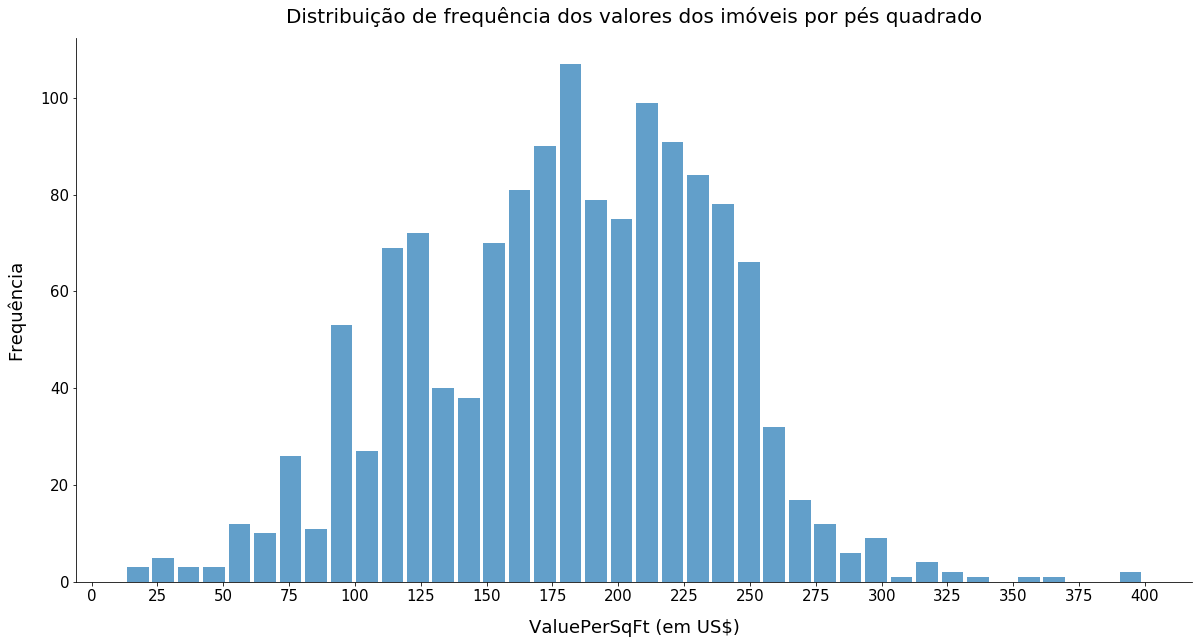

In [106]:
#Histograma com distribuição de frequência de Manhatan
histogramaPLT(housing[housing['Boro']=='Manhattan']['ValuePerSqFt'], 40)

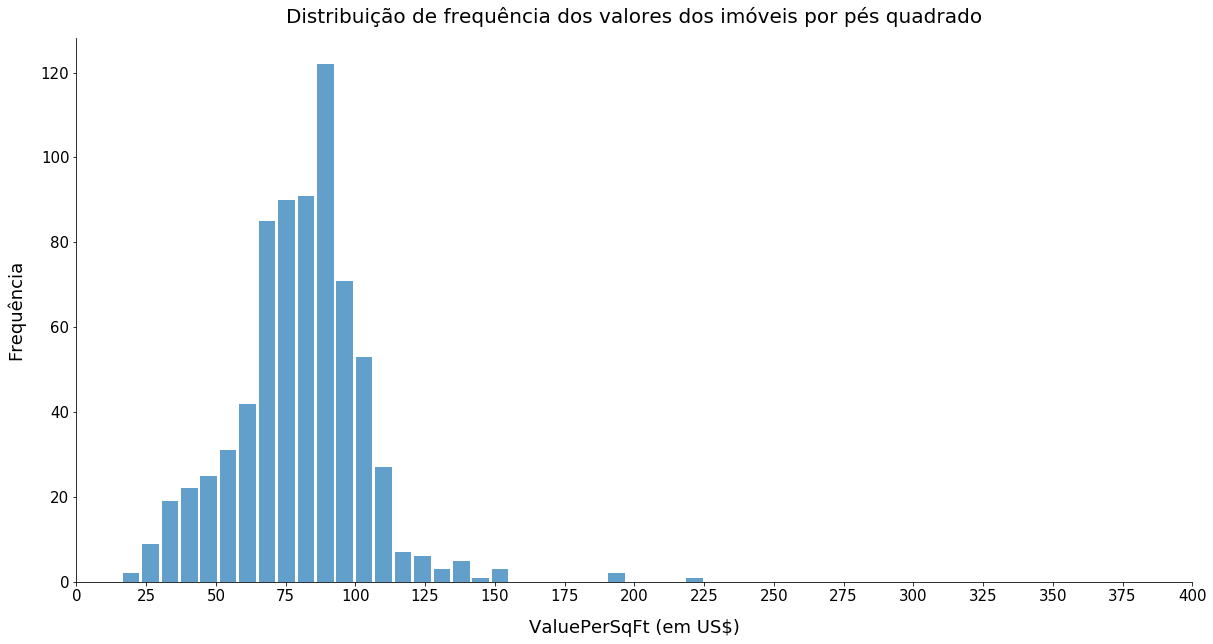

In [107]:
#Histograma com distribuição de frequência de Brooklyn
histogramaPLT(housing[housing['Boro']=='Brooklyn']['ValuePerSqFt'],30)

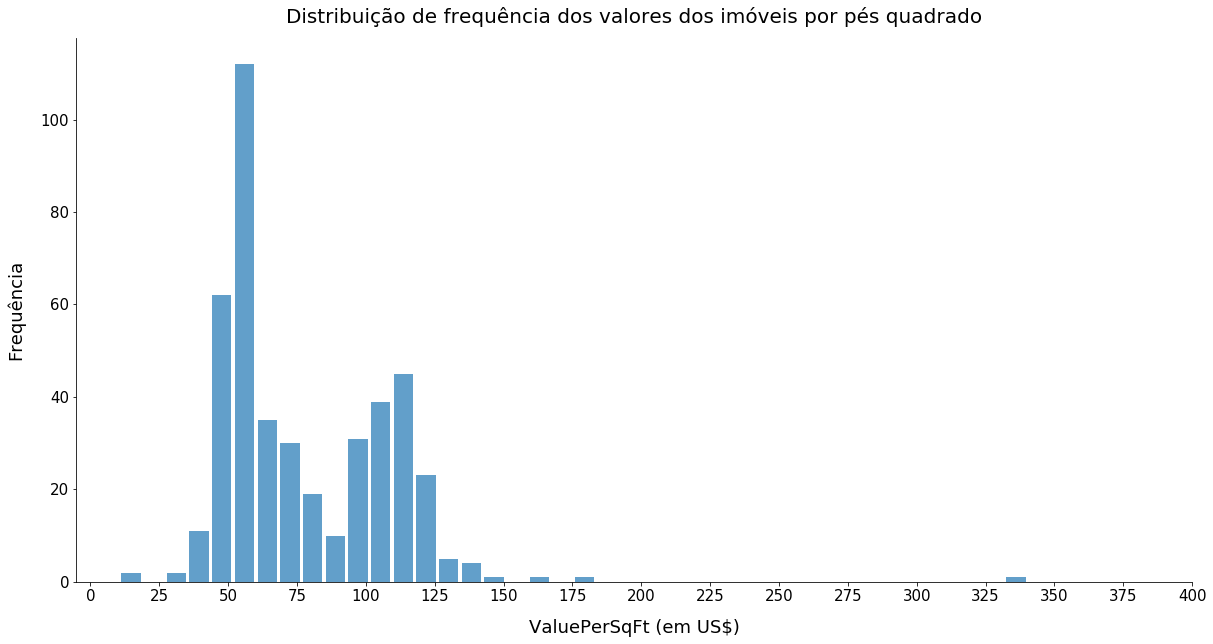

In [109]:
#Histograma com distribuição de frequência de Queens
histogramaPLT(housing[housing['Boro']=='Queens']['ValuePerSqFt'], 40)

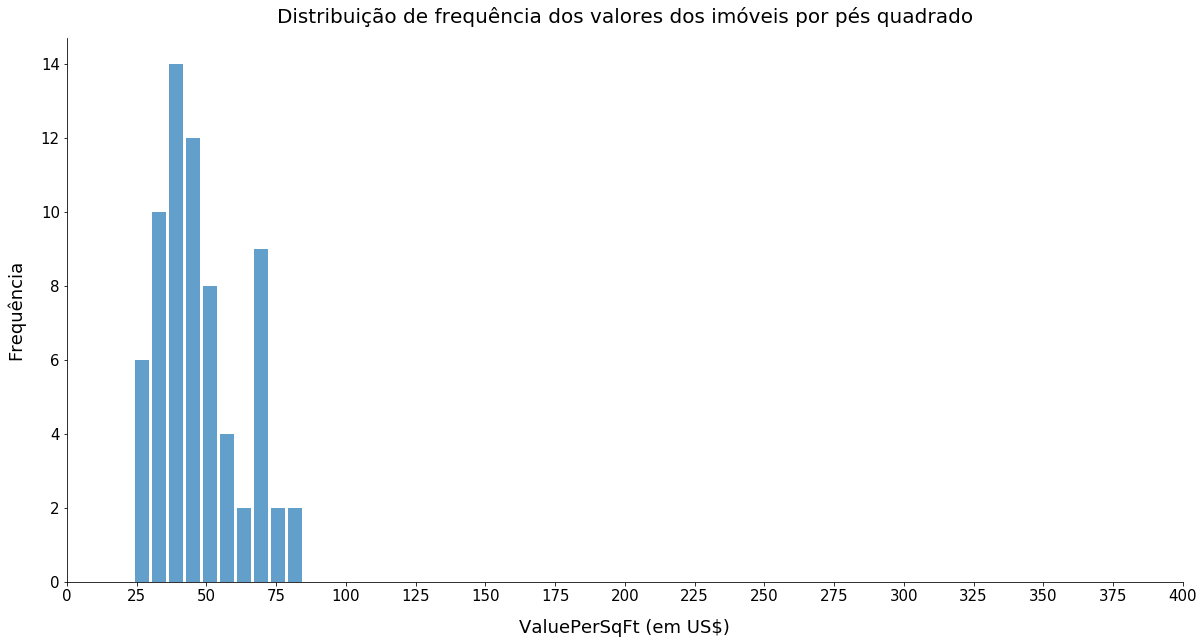

In [112]:
#Histograma com distribuição de frequência de Bronx
histogramaPLT(housing[housing['Boro']=='Bronx']['ValuePerSqFt'], 10)

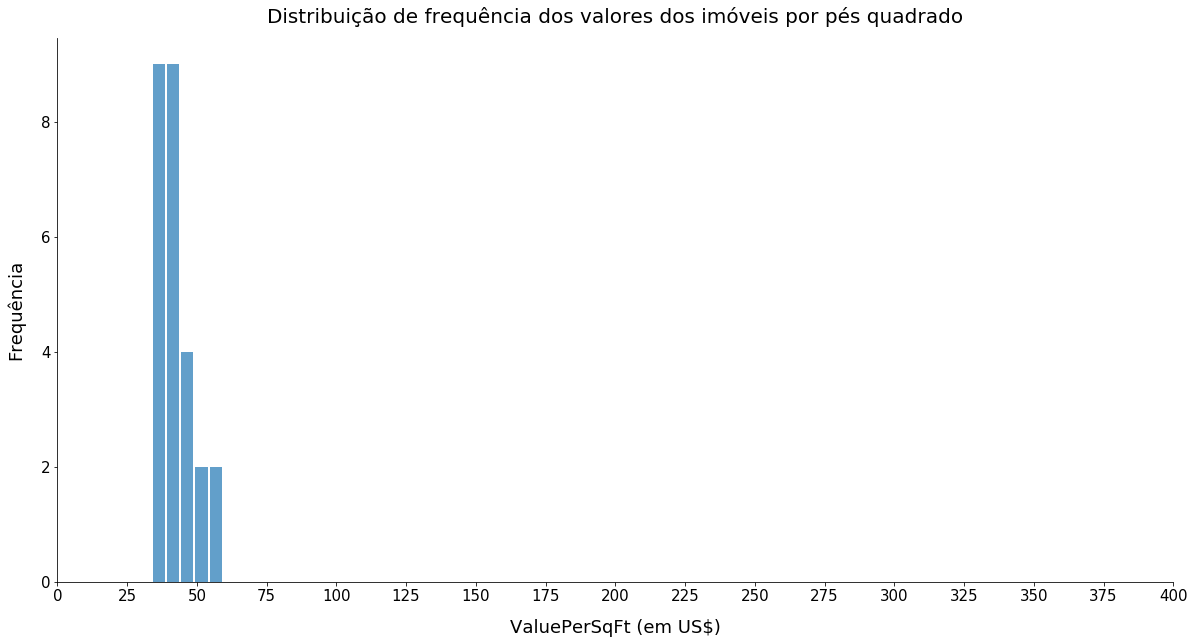

In [114]:
#Histograma com distribuição de frequência de Staten Island
histogramaPLT(housing[housing['Boro']=='Staten Island']['ValuePerSqFt'], 5)

In [133]:
bairros = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

In [137]:
for listagem in range(len(bairros)):
    print(bairros[listagem])
    print('Dados analizados: ', housing[housing['Boro']==bairros[listagem]].shape[0])

Manhattan
Dados analizados:  1380
Brooklyn
Dados analizados:  717
Queens
Dados analizados:  434
Bronx
Dados analizados:  69
Staten Island
Dados analizados:  26


Analizando os histogramas acima podemos deduzir que Manhattan é a localidade que mais possui edifícios e também é a região em que os edifícios cutão mais caros (variando de 100 a 300 dólares por pés quadrado) e sua distruibuição se mostra mais simétrica do que as demais. 

As demais regiões Brooklyn, Queens, Bronx e Staten Island apresentam edifícios com faixa de preço por pés quadrado mais concentrados a esquerda do gráfico, ou seja, são mais assimétricos a direita e tendem a valores mais baixos, em um range de 25 a 75 dólares.

Em um modelo de regressão, edifícios localizados na região de Manhattan tem alta possibilidade de receber valores acima de 100 dólares ao passo que nas demais regiões o modelo provavelmente atribuira valores abaixo de 100 dólares.

In [138]:
# 7. **(0,25 ponto) Investigue NA´s (Not Available = missing data = dados ausentes)**
#     - Faça summary(housing). Você identifica valores ausentes? 
#     - Faça sum(is.na(housing) para contar quantos são os valores ausentes. 
#     - Eles estão espalhados por mais de uma variável? 
#     - Pesquise sobre os comandos na.omit e complete.cases. 
#     - Faça a tabela de dupla entrada tabela_Boro_class<-xtabs (~Boro + Class, data = housing). Algo chama a atenção?
#     - Faça prop.table(tabela_Boro_class)

In [140]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626 entries, 0 to 2625
Data columns (total 13 columns):
Neighborhood      2626 non-null object
Class             2626 non-null object
Units             2626 non-null int64
YearBuilt         2530 non-null float64
SqFt              2626 non-null int64
Income            2626 non-null int64
IncomePerSqFt     2626 non-null float64
Expense           2626 non-null int64
ExpensePerSqFt    2626 non-null float64
NetIncome         2626 non-null int64
Value             2626 non-null int64
ValuePerSqFt      2626 non-null float64
Boro              2626 non-null object
dtypes: float64(4), int64(6), object(3)
memory usage: 266.8+ KB


In [139]:
# Conferindo se há algum nulo 
housing.isnull().sum()

Neighborhood       0
Class              0
Units              0
YearBuilt         96
SqFt               0
Income             0
IncomePerSqFt      0
Expense            0
ExpensePerSqFt     0
NetIncome          0
Value              0
ValuePerSqFt       0
Boro               0
dtype: int64

In [149]:
tabela_Boro_class = housing[['Class','Boro']]
tabela_Boro_class

,Class,Boro
0,R9-CONDOMINIUM,Manhattan
1,R4-CONDOMINIUM,Manhattan
2,RR-CONDOMINIUM,Manhattan
3,R4-CONDOMINIUM,Manhattan
4,R4-CONDOMINIUM,Manhattan
...,...,...
2621,R4-CONDOMINIUM,Staten Island
2622,R4-CONDOMINIUM,Staten Island
2623,R4-CONDOMINIUM,Staten Island
2624,R4-CONDOMINIUM,Staten Island


In [151]:
# Comando semelhante ao (prop.table(tabela_Boro_class))
pd.crosstab(tabela_Boro_class['Class'], tabela_Boro_class['Boro'])

Boro,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Class,,,,,
R2-CONDOMINIUM,27,225,82,107,0
R4-CONDOMINIUM,33,466,1063,295,26
R9-CONDOMINIUM,7,24,176,30,0
RR-CONDOMINIUM,2,2,59,2,0


Condomínuos do tipo R4 são os que mais tem ocorrencias, e em Staten Island, exitem apenas condomínuis R4. Outro fato curioso é que condomínios do tipo RR estão concentrados, em sua grande maiorias em Manhattan.

## MODELOS DE REGRESSÂO

In [ ]:

8. **(0,5 ponto) Construa os modelos de regressão:**


{-------------------------- **Codigo louco do frança**

	house1:ValuePerSqFt~Units+SqFt+YearBuilt+Income+Boro
	house2:ValuePerSqFt~Units*SqFt+YearBuilt+IncomePerSqFt+Income	+Boro
	house_log1:ValuePerSqFt~log⁡(Units)+log⁡(SqFt)+Boro
	house_log2:log⁡(ValuePerSqFt)~log⁡(Units)+log⁡(SqFt)+Boro
    
--------------------------------}



9. **Compare os modelos usando AIC(modelo1, modelo2, modelo3,modelo4)**

OBS: Um dos critérios para se comparar modelos de regressão é o Akaike Information Criteria AIC. 


10. **(0,5 ponto) Apresente os gráficos de resíduos x fitted para cada um dos modelos. O que eles sugerem?**

11. **(0,5 ponto) Faça o correspondente teste de Hipótese. Qual sua conclusão para cada modelo?**

12. **(0,5 ponto) Apresente os gráficos qqPlot para cada modelo. O que eles sugerem?**

13. **(0,5 ponto) Faça o correspondente teste de hipótese. Qual sua conclusão?**

14. **(0,5 ponto) Algum dos modelos apresenta problemas de multicolinearidade?**